In [4]:
from numpy import sin, cos, pi, exp, e
import numpy as np
from numpy.fft import fft, rfft
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')


<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Interpreting the Discrete Fourier Transform

* **Emne AIS2201 - Signalbehandling**
* **Uke 37, 2024**
* **Underviser: Kai Erik Hoff**


## Topics

* Recap: the discrete fourier transform
* Interpreting the fourier transform
    * Index and frequency
    * Magnitude
    * Phase
* Important DFT Properties
* Methods of computing the DFT
    * Fast Fourier Transform
    * Real-valued Fast Fourier Transform

## Recap: The Discrete Fourier Transform (DFT)

1. Signal is observed over a finite sample interval $N$
2. Extract magnitude and phase information for each quadrature component completing $m \in \mathbb{Z}$ full cycles over the course of $N$ samples

<img src="figures/Fig2_DFT_IO.png" style="width: 100%; margin-left: 0px" />

## Recap: The Discrete Fourier Transform (DFT)





* Definition:
$$X[m] = \sum_{n=0}^{N-1}x[n]\cdot e^{-j\cdot 2\pi \frac{m\cdot n}{N}} $$
    * Where $m$ is the *frequency index*

* Relationship between $m$ and normalized frequency

$$\hat{\omega}_m = \frac{2\pi \cdot m}{N}$$

* *Almost* the same principle as fourier series decomposition

* Results in frequency componets which make up the signal *window*  $x[n], n \in \{0, 1, 2, \ldots , N-1 \}$

* Output sequence $X[m]$ periodic over $N$ samples.

# The DFT Sequence

* Frequency content is *only* calculated for integer frequency indices $m \in \{1, 2, 3, \ldots, N-1\}$.
    * Frequency indices $m > \frac{N}{2}$ belong to the *negative halv* of the two-sided frequency spectrum.

    
<img src="figures/Fig4_DFT_1.png" style="width: 85%" />

## Example 1:

* The table below provides $N=4$ samples of the signal $x[n]$.

|n|0|1|2|3|
|--- |---|---|---|---|
|x\[n\]|2|-1|2|1|

* Perform the 4-point DFT of $x[n]$.

# Key concept: resolution bandwidth (RBW)

* The distance in the frequency domain between each computed frequency component $\Delta \hat{\omega}$.
* Inversely proportional to the window lenght $N$, ie. the number of samples used to compute the DFT.

\begin{align}
\Delta \hat{\omega} &= \frac{2\pi}{N} \\
\Delta \hat{f} &= \frac{1}{N}
\end{align}

* For signals sampled at a sampling rate $f_s$, the resolution bandwidth in $\text{Hz}$ is:

\begin{align}
\Delta f &= \Delta \hat{f} \cdot f_s \\
&= \frac{f_s}{N}
\end{align}


# Frequency index $m$ 

* DFT provides a finite sequence of "frequency samples".
    * A sampled version of some continuous frequency-domain representation.
* Each sample has a corresponding index $m$
* The frequency of any point in the DFT can be calculated using the index $m$ and the resolution bandwidth
    * For a $N$ point DFT this becomes:

$$\hat{\omega}_m = m\cdot \Delta \hat{\omega} = m\cdot \frac{2\pi}{N}$$

$$f_m = m\cdot \Delta f = m\cdot \frac{f_s}{N}$$




# Properties of the DFT

* Periodic over $N$ samples.
$$X[m] = X[m+l\cdot N], \ \ \ l \in \mathbb{Z}$$
* Complex conjugate symmetry for real-valued signals.
$$X[m] = X[-m]^* = X[N-m]^*$$

* DC-component:
    - Located at $m=0$.
    - Phase is either $0$ or $\pi$ (positive or negative sign for a real value)
* Midpoint $\left( m=\frac{N}{2} \right)$
    - Nyquist frequency
        - 2 samples per cycle
    - Phase is either $0$ or $\pi$ (for real-valued signals).

# Linearity

* The DFT is a **linear** transformation
    * Satisfies the *superposition principle*:

$$ \text{DFT}\left(x_1[n] + x_2[n] \right) = X_1[m] + X_2[m]$$

* Linearity illustrated: 

<img src="figures/Fig10_DFT_Linearity.png" style="width: 80%; margin-left: 100px" />

* Without this property the DFT would be unsuitablefor analysis of anything other than pure sine waves.

# Interpreting the DFT: Magnitude
* Magnitude of frequency sample $|X[m]|$ relates to sinusoid magnitude

<img src="figures/Fig5_DFT_2.png" style="width: 80%; margin-left: 100px" />

# Interpreting the DFT: Phase
* Angle of complex frequency sample $\angle X[m]$ relates to sinusoid phase

<img src="figures/Fig6_DFT_3.png" width="80%" />
[tweak figure]

#### Notes:
Very good video explaining how to use the DFT: [Understanding the Discrete Fourier Transform and the FFT](https://www.youtube.com/watch?v=QmgJmh2I3Fw)

## DFT of a sinusoid

Output()

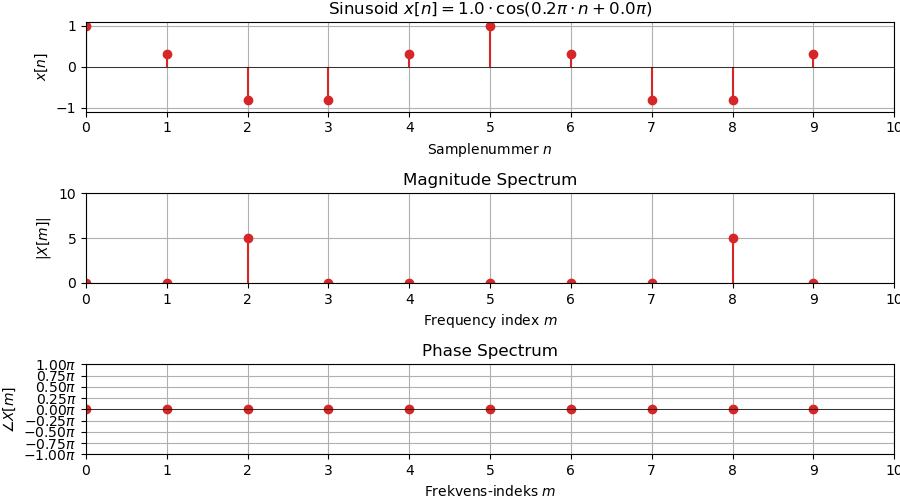

In [5]:
from demos import DFT_Demo
%matplotlib ipympl
DFT_Demo(2);

## Example 2

* The formula below represents the $N=16$-point DFT of some unknown sinusoid $x[n]$.

$$ X[m]= 
\begin{cases}
 4\sqrt{3} -j4, \ \ & m = 3\\
 4\sqrt{3} +j4, \ \ & m = 13\\
 0, & \text{ellers}
\end{cases}
$$

* Find normalized angular frequency $\hat{\omega}$, magnitude $|A|$ and phase $\phi$ for the sinusoid $x[n]$.

# Fast Fourier Transform (FFT)

* Computationally effective algorithm for calculating the DFT
    - No "normal" DFT function exists for Python (would be redundant and inefficient)
    - `numpy` FFT-function: [`numpy.fft.fft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft)
    
    
```python
import numpy as np
x_n = np.array([1, 2, 3, 4, 0, 4, 2 , 5, 3, 1, 4, 2])
X_m = np.fft.fft(x_n)
X_m
```
Outputs: 

```Python
array([31.        +0.00000000e+00j, -3.33012702+9.64101615e-01j,
       -0.5       -2.59807621e+00j, -5.        +4.00000000e+00j,
       -3.5       +8.66025404e-01j,  5.33012702-5.96410162e+00j,
       -5.        +2.22044605e-16j,  5.33012702+5.96410162e+00j,
       -3.5       -8.66025404e-01j, -5.        -4.00000000e+00j,
       -0.5       +2.59807621e+00j, -3.33012702-9.64101615e-01j])``` 

#### Notes:
Interesting video on the Fast Fourier Transform: [The Most Important Algorithm Of All Time](https://www.youtube.com/watch?v=nmgFG7PUHfo)

## Code example:
* Use `fft()` to calculate the frequency content of the signal  `x_n` from the datafile, and show a two-sided frequency spectrum with frequency in Hertz along the x-axis.
    * P.S. the function `numpy.fft.fftshift()` is useful for this purpose.

Text(0.5, 0, 'Frequency $f$ (Hz)')

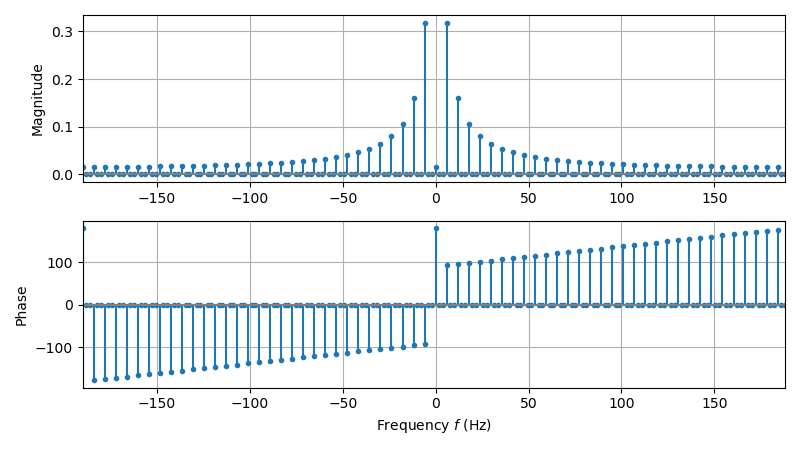

In [31]:
from scipy.io import loadmat

data = loadmat('data/06_DFT_data.mat', squeeze_me=True)
x_n = data['x2_n']
Fs = data['f_s']

X_m = np.fft.fft(x_n)
X_shifted = np.fft.fftshift(X_m)

N = len(x_n)
m = np.arange(-N//2, N//2)
f_m = Fs/N*m

X_mag = np.abs(X_shifted)/N
X_phase = np.where(X_mag > 1e-10, np.angle(X_shifted, deg=True), 0)


plt.figure()
plt.subplot(2,1,1)
plt.stem(f_m, X_mag, markerfmt='.', basefmt='grey')

plt.ylabel("Magnitude")
plt.subplot(2,1,2)
plt.stem(f_m, X_phase, markerfmt='.', basefmt='grey')
plt.ylabel("Phase")
plt.xlabel("Frequency $f$ (Hz)")

# Real-valued Fast Fourier Transform (RFFT)

* Effective FFT algorithm optimized for real-valued signals

* "Half-length" output
    * Representing symmetrical two-sided spectrum is redundant
    * Calculates $X[m]$ for:

$$m \in [0, m_{\text{max}} ], \ \ \ m_{\text{max}} = \begin{cases} \frac{N}{2}, & N \text{ even} \\ \\ \frac{N-1}{2}, & N \text{ odd} \end{cases}$$

* Beware, one RFFT output may originate from two signals!
    * Example:
        * If $N = 8$, $m_{\text{max}} = 4$
        * If $N = 9$, $m_{\text{max}} = 4$
    * Important to keep track of original length $N$ when using `rfft`

## Code example:

* Given two signals:
\begin{align}
x_1[n] &= \{9, 9, 9, 9, 9, 9, 9, 9\} \\ \\
x_2[n] &= \{8, 8, 8, 8, 8, 8, 8, 8, 8\}
\end{align}
use `rfft` to calculate the real-valued DFT of each signal. 

In [32]:
x_1 = np.ones(8)*9
x_2 = np.ones(9)*8

print(f"{rfft(x_1) = }")
print(f"{rfft(x_2) = }")

rfft(x_1) = array([72.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j])
rfft(x_2) = array([72.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])


As we see, both signals while having different length and content, produce the exact same RFFT output.

# Any Questions?

* **Recommended videos:**
    * [Understanding the Discrete Fourier Transform and the FFT](https://www.youtube.com/watch?v=QmgJmh2I3Fw)
    * [The Most Important Algorithm Of All Time](https://www.youtube.com/watch?v=nmgFG7PUHfo)